In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
train_data = pd.read_csv('titanic_download/train.csv')

In [3]:
test_data = pd.read_csv('titanic_download/test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.shape

(891, 12)

In [7]:
test_data.shape

(418, 11)

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train_data.drop(columns='Cabin', inplace=True)

In [11]:
age_mean = train_data.Age.mean()
train_data.Age.fillna(age_mean, inplace=True)

In [12]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
test_data.drop(columns='Cabin', inplace=True)
test_data.Age.fillna(age_mean, inplace=True)
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [14]:
test_data.drop(columns=['Ticket', 'Name'], inplace=True)
train_data.drop(columns=['Ticket', 'Name'], inplace=True)

In [15]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [16]:
train_data = pd.get_dummies(train_data)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [17]:
test_data = pd.get_dummies(test_data)
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [18]:
survived = [i == 1 for i in train_data.Survived].count(True)
survived

342

In [19]:
not_survived = (train_data.Survived.values == 0).sum()
not_survived

549

In [20]:
height = [survived, not_survived]
points = ["Survived", "Not Survived"]

<BarContainer object of 2 artists>

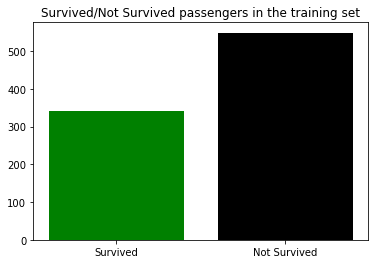

In [21]:
plt.title("Survived/Not Survived passengers in the training set")
plt.bar(points, height, color = ['green', 'black'])

In [22]:
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
clf_1 = LogisticRegression()
history_1 = clf_1.fit(X_train, y_train)

In [25]:
predict_1 = clf_1.predict(X_test)

In [26]:
confusion_matrix(y_test, predict_1)

array([[154,  30],
       [ 32,  79]])

In [27]:
accuracy_score(y_test, predict_1)

0.7898305084745763

In [28]:
recall_score(y_test, predict_1)

0.7117117117117117

In [29]:
precision_score(y_test, predict_1)

0.7247706422018348

In [30]:
clf_2 = RandomForestClassifier(max_depth=5, random_state=0, n_estimators = 360)
history_2 = clf_2.fit(X_train, y_train)
predict_2 = clf_2.predict(X_test)

In [31]:
confusion_matrix(y_test, predict_2)

array([[160,  24],
       [ 32,  79]])

In [32]:
accuracy_score(y_test, predict_2)

0.8101694915254237

In [33]:
recall_score(y_test, predict_2)

0.7117117117117117

In [34]:
precision_score(y_test, predict_2)

0.7669902912621359

In [35]:

clf_3 = SVC(C=3, kernel='poly', gamma='scale', random_state=0)
history_3 = clf_3.fit(X_train, y_train)
predict_3 = clf_3.predict(X_test)

In [36]:
confusion_matrix(y_test, predict_3)

array([[164,  20],
       [ 37,  74]])

In [37]:
accuracy_score(y_test, predict_3)

0.8067796610169492

In [38]:
clf_4 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4, min_samples_leaf=3),
    n_estimators=12, algorithm="SAMME.R", learning_rate=0.05, random_state=0
)
history_4 = clf_4.fit(X_train, y_train)
predict_4 = clf_4.predict(X_test)

In [39]:
confusion_matrix(y_test, predict_4)

array([[160,  24],
       [ 26,  85]])

In [40]:
accuracy_score(y_test, predict_4)

0.8305084745762712

In [41]:
from sklearn.ensemble import VotingClassifier

clf_ensemble = VotingClassifier(estimators = [('rfc', clf_2), ('svc', clf_3), ('ab', clf_4)], voting='hard')
history_ensemble = clf_ensemble.fit(X_train, y_train)
predict_ensemble = clf_ensemble.predict(X_test)

In [42]:
confusion_matrix(y_test, predict_ensemble)

array([[162,  22],
       [ 31,  80]])

In [43]:
accuracy_score(y_test, predict_ensemble)

0.8203389830508474

In [44]:

cv_score = cross_val_score(clf_2, X, y, cv=5)

In [45]:
cv_score.mean()

0.8193082669010107

In [46]:
y_pred = cross_val_predict(clf_2, X_test, y_test, cv=3)
accuracy_score(y_test, y_pred)

0.7830508474576271

In [47]:
##Reduction of features

In [48]:
X.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [49]:
X_2 = X.drop(columns=['SibSp', 'Parch', 'PassengerId'])

In [50]:
X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, test_size=0.33, random_state=0)

In [51]:
clf_4_2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4, min_samples_leaf=3),
    n_estimators=12, algorithm="SAMME.R", learning_rate=0.05, random_state=0
)
history_4_2 = clf_4_2.fit(X_train_2, y_train)
predict_4_2 = clf_4_2.predict(X_test_2)

In [52]:
accuracy_score(y_test, predict_4_2)

0.8135593220338984

In [53]:
clf_2_2 = RandomForestClassifier(max_depth=5, random_state=0, n_estimators = 360)
history_2_2 = clf_2_2.fit(X_train_2, y_train)
predict_2_2 = clf_2_2.predict(X_test_2)

In [54]:
accuracy_score(y_test, predict_2_2)

0.823728813559322

In [55]:
clf_4.score(X_train, y_train) #AdaBoostClassifier

0.8942953020134228

In [56]:
clf_4.score(X_test, y_test)

0.8305084745762712

In [57]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [58]:
av_fare_test = test_data.mean()
test_data.fillna(av_fare_test, inplace=True)

In [59]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [60]:
X_test_scaled = scaler.fit_transform(test_data)
result = clf_4.predict(X_test_scaled)

In [68]:
test_data_Survived = pd.Series(result, name="Survived")
test_data_ID = test_data["PassengerId"]

results = pd.concat([test_data_ID,test_data_Survived],axis=1)

results.to_csv("titanic_predictions_RafalR.csv",index=False)

In [65]:
results_view = (results.Survived.values == 1).sum()
results_view 

156

In [66]:
results

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
##kaggle rank after submission: 1917